In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/36345/status,
Dashboard: /proxy/36345/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46573,Workers: 4
Dashboard: /proxy/36345/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:35203,Total threads: 4
Dashboard: /proxy/34879/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:44373,


In [3]:
# time period
start_time = '1995-01-01'
end_time = '2000-01-01'


In [5]:
session = cc.database.create_session()

In [10]:
# load ACCESS-OM2-01 streamfunction psi(x,y,rho,t)
expt = '01deg_jra55v13_iaf'
umo = cc.querying.getvar(expt,'tx_trans', session, start_time=start_time, end_time=end_time)

In [12]:
umo = umo.sel(time = slice(start_time,end_time)).sel(yt_ocean = slice(-90,-50))

In [14]:
flux = umo.mean('time').cumsum('yt_ocean')/1e9

In [15]:
flux

<xarray.DataArray 'tx_trans' (st_ocean: 75, yt_ocean: 666, xu_ocean: 3600)>
dask.array<truediv, shape=(75, 666, 3600), dtype=float32, chunksize=(7, 300, 400), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -50.16 -50.09 -50.03
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0

now calculate the streamfunction in each depth layer


In [16]:
transect1 = flux.sel(xu_ocean = -50, method = 'nearest').load()

In [17]:
transect2 = flux.sel(xu_ocean = -30, method = 'nearest').load()

In [18]:
transect3 = flux.sel(xu_ocean = 0, method = 'nearest').load()

In [19]:
transect4 = flux.sel(xu_ocean = 30, method = 'nearest').load()

In [20]:
transect5 = flux.sel(xu_ocean = 60, method = 'nearest').load()

In [21]:
transect6 = flux.sel(xu_ocean = -270, method = 'nearest').load()

In [22]:
transect7 = flux.sel(xu_ocean = -240, method = 'nearest').load()

In [23]:
transect8 = flux.sel(xu_ocean = -210, method = 'nearest').load()

In [24]:
transect9 = flux.sel(xu_ocean = -180, method = 'nearest').load()

In [25]:
transect10 = flux.sel(xu_ocean = -150, method = 'nearest').load()

Text(0, 0.5, 'streamfunction (Sv)')

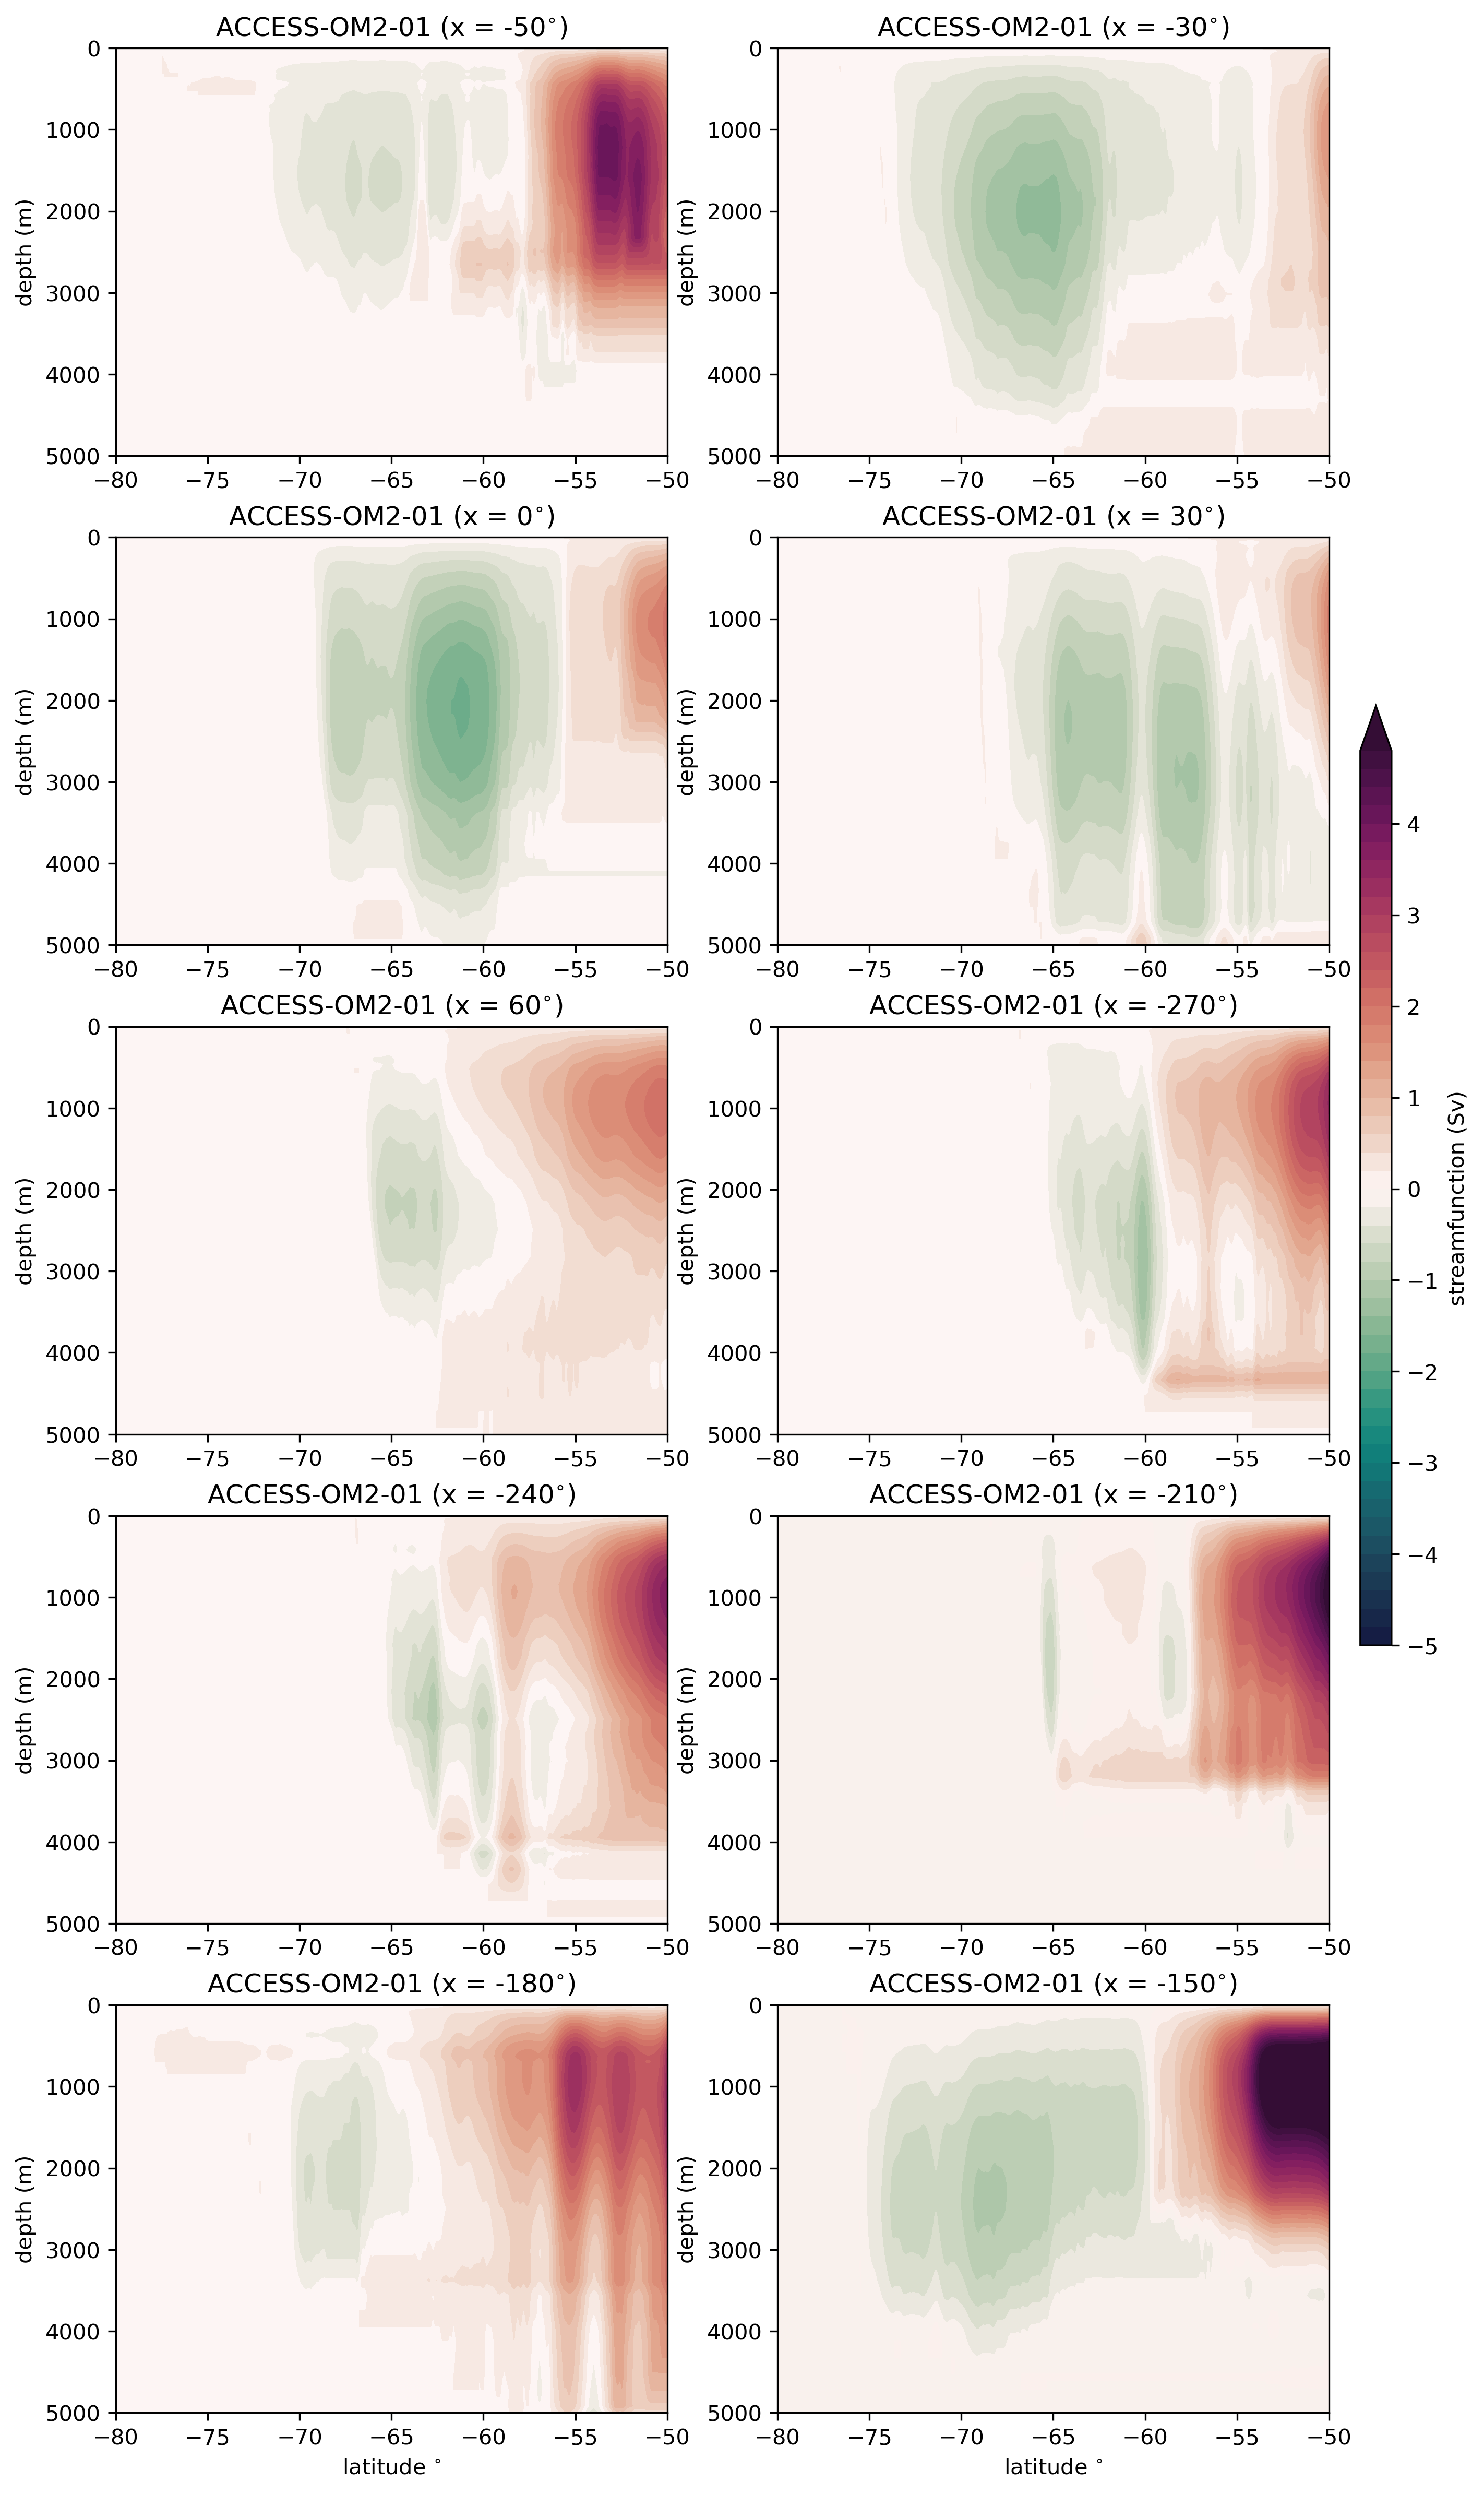

In [27]:
plt.figure(figsize=(10,20),dpi = 300)
#1
ax = plt.subplot(5,2,1)
p1 = transect1.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = -50$^{\circ}$)')
#2
ax = plt.subplot(5,2,2)
p1 = transect2.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = -30$^{\circ}$)')
#3
ax = plt.subplot(5,2,3)
p1 = transect3.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = 0$^{\circ}$)')
#4
ax = plt.subplot(5,2,4)
p1 = transect4.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = 30$^{\circ}$)')
#5
ax = plt.subplot(5,2,5)
p1 = transect5.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = 60$^{\circ}$)')
#6
ax = plt.subplot(5,2,6)
p1 = transect6.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = -270$^{\circ}$)')
#7
ax = plt.subplot(5,2,7)
p1 = transect7.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = -240$^{\circ}$)')
#8
ax = plt.subplot(5,2,8)
p1 = transect8.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = -210$^{\circ}$)')
#9
ax = plt.subplot(5,2,9)
p1 = transect9.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('depth (m)')
plt.xlabel('latitude $^{\circ}$')
ax.set_title('ACCESS-OM2-01 (x = -180$^{\circ}$)')
#10
ax = plt.subplot(5,2,10)
p1 = transect10.plot.contourf(ax=ax, levels = np.arange(-5,5,0.2),cmap=cm.cm.curl, add_colorbar=False)
plt.ylim(0,5000.)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('latitude $^{\circ}$')
plt.ylabel('depth (m)')
ax.set_title('ACCESS-OM2-01 (x = -150$^{\circ}$)')

# add the colorabr and legend
# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')